In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-covid19-data/continents2.csv
/kaggle/input/world-covid19-data/CONVENIENT_global_deaths.csv
/kaggle/input/world-covid19-data/RAW_global_deaths.csv
/kaggle/input/world-covid19-data/RAW_global_confirmed_cases.csv
/kaggle/input/world-covid19-data/CONVENIENT_us_deaths.csv
/kaggle/input/world-covid19-data/CONVENIENT_global_metadata.csv
/kaggle/input/world-covid19-data/RAW_us_confirmed_cases.csv
/kaggle/input/world-covid19-data/CONVENIENT_us_confirmed_cases.csv
/kaggle/input/world-covid19-data/CONVENIENT_global_confirmed_cases.csv
/kaggle/input/world-covid19-data/CONVENIENT_us_metadata.csv
/kaggle/input/world-covid19-data/RAW_us_deaths.csv


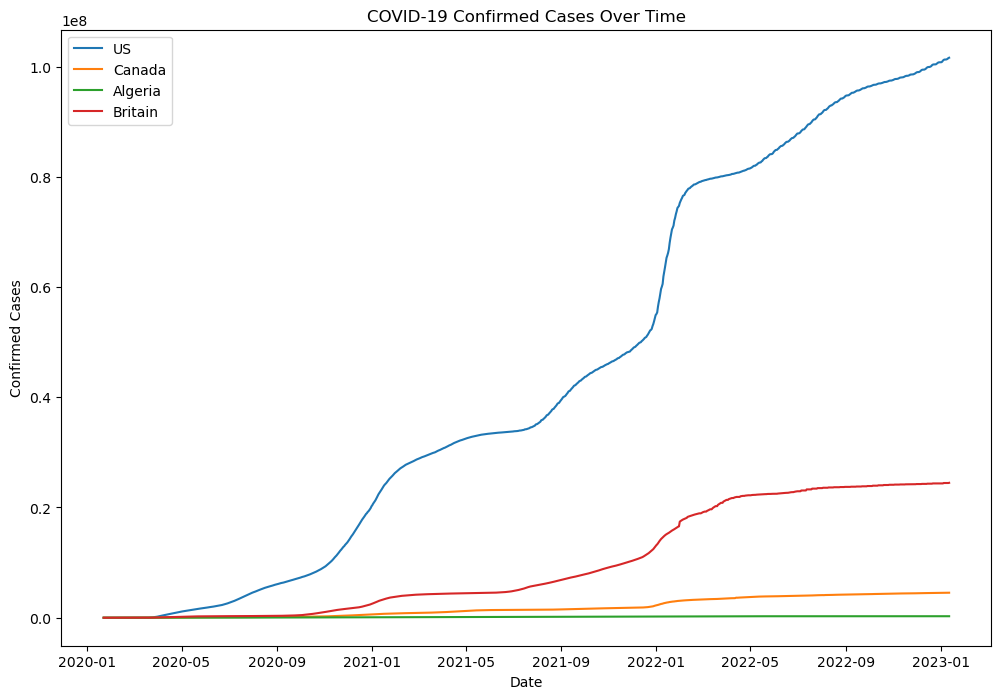

In [2]:
Confirmed_Cases = "/kaggle/input/world-covid19-data/RAW_global_confirmed_cases.csv"
df = pd.read_csv(Confirmed_Cases)
df = df.drop(["Lat", "Long"], axis=1)


df = df.groupby("Country/Region").sum().reset_index()


df = df.transpose()
header = df.iloc[0]
df = df[1:]
df.columns = header
df.reset_index(inplace=True)

# Rename the index column to 'Date' and convert it to a datetime object
df.rename(columns={"index": "Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])

plt.figure(figsize=(12, 8))
plt.plot(df["Date"], df["US"], label="US")
plt.plot(df["Date"], df["Canada"], label="Canada")
plt.plot(df["Date"], df["Algeria"], label="Algeria")
plt.plot(df["Date"], df["United Kingdom"], label = "Britain")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Over Time")
plt.legend()
plt.show()
